# 1. 전처리

### 함수호출 & 데이터 불러오기

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

AM_train = pd.read_csv("Auction_master_train.csv")
print(AM_train.shape)
AM_train

(1933, 41)


,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000
5,2238,강제,일반,105437195,한마음감정,2017-01-03 00:00:00,2,1,8635.0,41.39,...,NaN,N,일산봉로,58.0,NaN,2017-10-25 00:00:00,배당,35.086933,129.065706,206989000
6,1923,임의,일반,137548730,미래새한감정,2016-01-19 00:00:00,3,2,7927.0,81.77,...,NaN,N,동삼서로,61.0,NaN,2016-11-03 00:00:00,배당,35.084049,129.070231,135500000
7,2527,임의,일반,506916971,부일감정,2016-04-28 00:00:00,2,1,331281.0,92.22,...,NaN,N,분포로,111.0,NaN,2016-11-22 00:00:00,배당,35.127808,129.112206,640299999
8,2259,강제,일반,40782876,금정감정,2016-03-08 00:00:00,2,1,1017.0,66.44,...,NaN,N,천마로27번길,10.0,NaN,2016-09-27 00:00:00,배당,35.080817,129.020155,77380000
9,2666,임의,일반,150000000,연산감정,2017-03-27 00:00:00,2,1,27447.2,78.52,...,NaN,N,재반로84번길,96.0,7.0,2017-12-27 00:00:00,배당,35.187903,129.130913,177070000


### 날짜 데이터 처리


Diff_date = First_auction_date - Final_auction_date

In [2]:
def change_datetime(x):
    today = datetime.date.today()
    someday = datetime.date(int(x[:4]), int(x[5:7]), int(x[8:10]))
    diff = today - someday
    return diff.days

AM_train["Appraisal_date"] = AM_train["Appraisal_date"].apply(lambda x : x[:10])
AM_train["First_auction_date"] = AM_train["First_auction_date"].apply(lambda x : x[:10])
AM_train["Final_auction_date"] = AM_train["Final_auction_date"].apply(lambda x : x[:10])
AM_train["Preserve_regist_date"] = AM_train["Preserve_regist_date"].apply(lambda x : x[:10])
AM_train["Close_date"] = AM_train["Close_date"].apply(lambda x : x[:10])

AM_train["Appraisal_date"] = AM_train["Appraisal_date"].apply(change_datetime)
AM_train["First_auction_date"] = AM_train["First_auction_date"].apply(change_datetime)
AM_train["Final_auction_date"] = AM_train["Final_auction_date"].apply(change_datetime)
AM_train["Preserve_regist_date"] = AM_train["Preserve_regist_date"].apply(change_datetime)
AM_train["Close_date"] = AM_train["Close_date"].apply(change_datetime)

AM_train["Diff_date"] = AM_train['First_auction_date'] - AM_train['Final_auction_date']

### 범주형 변수 수치화

In [3]:
'''
print(AM_train.Auction_class.unique())
AM_train.Auction_class.replace({'임의':0, '강제':1},inplace=True)


print(AM_train.Bid_class.unique())
AM_train.Bid_class.replace({'개별':0, '일반':1, '일괄':2},inplace=True)

print(AM_train.addr_do.unique())
AM_train.addr_do.replace({'부산':0, '서울':1},inplace=True)

print(AM_train.Apartment_usage.unique())
AM_train.Apartment_usage.replace({'주상복합':0, '아파트':1},inplace=True)

print(AM_train.Share_auction_YorN.unique())
AM_train.Share_auction_YorN.replace({'N':0, 'Y':1},inplace=True)

print(AM_train.Close_result.unique())
AM_train.Close_result.replace({'    ':0, '배당':1},inplace=True)
'''

"\nprint(AM_train.Auction_class.unique())\nAM_train.Auction_class.replace({'임의':0, '강제':1},inplace=True)\n\n\nprint(AM_train.Bid_class.unique())\nAM_train.Bid_class.replace({'개별':0, '일반':1, '일괄':2},inplace=True)\n\nprint(AM_train.addr_do.unique())\nAM_train.addr_do.replace({'부산':0, '서울':1},inplace=True)\n\nprint(AM_train.Apartment_usage.unique())\nAM_train.Apartment_usage.replace({'주상복합':0, '아파트':1},inplace=True)\n\nprint(AM_train.Share_auction_YorN.unique())\nAM_train.Share_auction_YorN.replace({'N':0, 'Y':1},inplace=True)\n\nprint(AM_train.Close_result.unique())\nAM_train.Close_result.replace({'    ':0, '배당':1},inplace=True)\n"

### 변수 삭제

Auction_key : 고유키값

Close_result : 전체데이터 1933개중 공백란 12개 나머지 동일

Final_result : 전체 데이터 값 낙찰로 동일

Specific : 대부분이 결측치

Appraisal_company, Creditor : 각각 238개, 448개의 factor 회사이름

point.x, point.y : 위도 경도가 표시하는 점이 addr_do의 부산 서울과 같음.

addr_si, addr_dong, addr_li, addr_san addr_bunji1, addr_bunji2, addr_etc,road_name, road_bunji1, road_bunji2

: addr_do의 하위 주소값

Appraisal_date. First_auction_date, Final_auction_date, Preserve_regist_date, Close_date : 날짜데이터 삭제(분석불가)


0
238
1
448
39
285
56


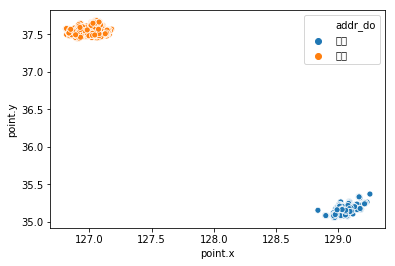

In [4]:
print(len(AM_train.loc[AM_train.Close_result == 0])) #12개
print(len(AM_train.Appraisal_company.unique())) #238개
print(len(AM_train.Final_result.unique())) #1개
print(len(AM_train.Creditor.unique())) #448개
print(len(AM_train.addr_si.unique())) #39개
print(len(AM_train.addr_dong.unique())) #285개
print(len(AM_train.Specific.unique())) #56개 + 대부분 결측치

sns.scatterplot(x="point.x", y="point.y", hue = "addr_do", data = AM_train)

In [5]:
del AM_train["Auction_key"]
del AM_train["point.x"]
del AM_train["point.y"]
del AM_train['Appraisal_company']
del AM_train["Final_result"]
del AM_train["Creditor"]
del AM_train["addr_si"]
del AM_train["addr_dong"]
del AM_train["addr_li"]
del AM_train["addr_san"]
del AM_train["addr_bunji1"]
del AM_train["addr_bunji2"]
del AM_train["addr_etc"]
del AM_train["Specific"]
del AM_train["road_name"]
del AM_train["road_bunji1"]
del AM_train["road_bunji2"]
del AM_train["Close_result"]
del AM_train["Share_auction_YorN"]
del AM_train["Appraisal_date"]
del AM_train["First_auction_date"]
del AM_train["Final_auction_date"]
del AM_train["Preserve_regist_date"]
del AM_train["Close_date"]

In [6]:
AM_train.columns
AM_train.head()

,Auction_class,Bid_class,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_do,Apartment_usage,Total_floor,Current_floor,Hammer_price,Diff_date
0,임의,개별,1766037301,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,부산,주상복합,45,5,760000000,35
1,임의,일반,152946867,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,부산,아파트,70,51,971889999,35
2,임의,개별,11326510,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,부산,아파트,15,14,93399999,77
3,임의,일반,183581724,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,부산,아파트,20,11,256899000,105
4,강제,일반,45887671,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,부산,아파트,7,7,158660000,28


### 변수간 다중공선성 확인

모든 변수 vif가 10 이하가 될때까지 vif가 가장 큰 변수순으로 하나씩 지우면서 확인

vif > 10 변수 삭제

Total_land_auction_area

Total_building_area

Total_appraisal_price

Auction_count

Total_building_auction_area

In [7]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
del AM_train["Total_land_auction_area"] # vif = 953.801409	
del AM_train["Total_building_area"] # vif = 93.598131
del AM_train["Total_appraisal_price"] # vif = 67.200478
del AM_train["Auction_count"] # vif = 19.133609
del AM_train["Total_building_auction_area"] # vif = 14.682425

In [9]:
a = AM_train.columns.tolist()
a.remove('Hammer_price')
print(a)

['Auction_class', 'Bid_class', 'Claim_price', 'Auction_miscarriage_count', 'Total_land_gross_area', 'Total_land_real_area', 'Minimum_sales_price', 'addr_do', 'Apartment_usage', 'Total_floor', 'Current_floor', 'Diff_date']


In [1]:
features = "+".join(a)
y, X = dmatrices('Hammer_price ~' + features, AM_train, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

NameError: name 'a' is not defined

### one-hot encoding

In [11]:
AM_train.dtypes

Auction_class                 object
Bid_class                     object
Claim_price                    int64
Auction_miscarriage_count      int64
Total_land_gross_area        float64
Total_land_real_area         float64
Minimum_sales_price            int64
addr_do                       object
Apartment_usage               object
Total_floor                    int64
Current_floor                  int64
Hammer_price                   int64
Diff_date                      int64
dtype: object

In [12]:
AM_train = pd.get_dummies(AM_train, columns=['Auction_class'], prefix='Auction_class')
AM_train = pd.get_dummies(AM_train, columns=['Bid_class'], prefix='Bid_class')
AM_train = pd.get_dummies(AM_train, columns=['addr_do'], prefix='addr_do')
AM_train = pd.get_dummies(AM_train, columns=['Apartment_usage'], prefix='Apartment_usage')

In [13]:
AM_train.dtypes

Claim_price                    int64
Auction_miscarriage_count      int64
Total_land_gross_area        float64
Total_land_real_area         float64
Minimum_sales_price            int64
Total_floor                    int64
Current_floor                  int64
Hammer_price                   int64
Diff_date                      int64
Auction_class_강제               uint8
Auction_class_임의               uint8
Bid_class_개별                   uint8
Bid_class_일괄                   uint8
Bid_class_일반                   uint8
addr_do_부산                     uint8
addr_do_서울                     uint8
Apartment_usage_아파트            uint8
Apartment_usage_주상복합           uint8
dtype: object

### 연속형 변수 정규화

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
continue_col = list(AM_train.select_dtypes(exclude='uint8').columns)
continue_col.remove('Hammer_price')
continue_col

['Claim_price',
 'Auction_miscarriage_count',
 'Total_land_gross_area',
 'Total_land_real_area',
 'Minimum_sales_price',
 'Total_floor',
 'Current_floor',
 'Diff_date']

In [16]:
data = [[0, 0], [0, 0], [1, 1], [1, 1]]

In [17]:
AM_train['Diff_date'].values.reshape(-1,1)

array([[35],
       [35],
       [77],
       ...,
       [28],
       [35],
       [35]], dtype=int64)

In [18]:
for col in continue_col:
    stand = StandardScaler()
    stand.fit(AM_train[col].values.reshape(-1,1))
    AM_train[col] = stand.transform(AM_train[col].values.reshape(-1,1))

C:\Users\CHAEBIN\AppData\Local\conda\conda\envs\ml_scratch\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\CHAEBIN\AppData\Local\conda\conda\envs\ml_scratch\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\CHAEBIN\AppData\Local\conda\conda\envs\ml_scratch\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\CHAEBIN\AppData\Local\conda\conda\envs\ml_scratch\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\U

In [19]:
AM_train["Hammer_price_bin"] = np.where(AM_train["Hammer_price"] <=np.percentile(AM_train["Hammer_price"], 50), 0,1)
del AM_train["Hammer_price"]

In [20]:
AM_train.head()

,Claim_price,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Minimum_sales_price,Total_floor,Current_floor,Diff_date,Auction_class_강제,Auction_class_임의,Bid_class_개별,Bid_class_일괄,Bid_class_일반,addr_do_부산,addr_do_서울,Apartment_usage_아파트,Apartment_usage_주상복합,Hammer_price_bin
0,1.043456,0.254466,-0.233008,-0.076371,0.503488,2.947348,-0.474712,-0.208361,0,1,1,0,0,1,0,0,1,1
1,-0.162572,0.254466,0.083594,-0.361243,0.880500,5.577111,5.244858,-0.208361,0,1,0,0,1,1,0,1,0,1
2,-0.268455,1.457112,1.219281,0.439278,-0.674955,-0.208368,0.644334,0.061122,0,1,1,0,0,1,0,1,0,0
3,-0.139668,0.254466,-0.107866,-0.143337,-0.367618,0.317585,0.271319,0.240778,0,1,0,0,1,1,0,1,0,0
4,-0.242615,0.254466,-0.358203,0.043615,-0.555965,-1.049892,-0.226035,-0.253275,1,0,0,0,1,1,0,1,0,0


In [21]:
AM_train.dtypes

Claim_price                  float64
Auction_miscarriage_count    float64
Total_land_gross_area        float64
Total_land_real_area         float64
Minimum_sales_price          float64
Total_floor                  float64
Current_floor                float64
Diff_date                    float64
Auction_class_강제               uint8
Auction_class_임의               uint8
Bid_class_개별                   uint8
Bid_class_일괄                   uint8
Bid_class_일반                   uint8
addr_do_부산                     uint8
addr_do_서울                     uint8
Apartment_usage_아파트            uint8
Apartment_usage_주상복합           uint8
Hammer_price_bin               int32
dtype: object

# 2. 모델 예측 및 비교

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [23]:
X_train = AM_train.drop('Hammer_price_bin', axis=1).values
target_label = AM_train['Hammer_price_bin'].values
X_tr, X_test, y_tr, y_test = train_test_split(X_train, target_label, test_size=0.2, random_state=2018)
X_tr.shape, X_test.shape,y_tr.shape, y_test.shape

((1546, 17), (387, 17), (1546,), (387,))

### model1 : Logistic Regression

In [24]:
model1 = LogisticRegression().fit(X_tr, y_tr)
prediction1 = model1.predict(X_test)

In [25]:
print(confusion_matrix(y_test,prediction1))
cross_val_score(model1, X_train, target_label, cv=5).mean()

[[195   5]
 [  9 178]]


0.9240345274075583

### model2 : naive bayes

In [26]:
model2 = GaussianNB().fit(X_tr, y_tr)
prediction2 = model2.predict(X_test)

In [27]:
print(confusion_matrix(y_test,prediction2))
cross_val_score(model2, X_train, target_label, cv=5).mean()

[[189  11]
 [ 27 160]]


0.8113163760466315

### model3 : svm

In [28]:
model3 = SVC().fit(X_tr, y_tr)
prediction3 = model3.predict(X_test)

In [29]:
print(confusion_matrix(y_test,prediction3))
cross_val_score(model3, X_train, target_label, cv=5).mean()

[[192   8]
 [ 12 175]]


0.9038353135191904

In [30]:
param_range3 = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid3 = {'gamma': param_range3, 'C': param_range3}
grid3 = GridSearchCV(estimator=model3, param_grid=param_grid3, cv=5, n_jobs=-1)
grid3 = grid3.fit(X_train, target_label)

In [31]:
print(grid3.best_score_)
print(grid3.best_params_)

0.9461976202793585
{'C': 100.0, 'gamma': 0.01}


### model4 : knn

In [32]:
model4 = KNeighborsClassifier().fit(X_tr, y_tr)
prediction4 = model4.predict(X_test)

In [33]:
print(confusion_matrix(y_test,prediction4))
cross_val_score(model4, X_train, target_label, cv=5).mean()

[[181  19]
 [ 31 156]]


0.8381471111149758

In [34]:
param_range4 = list(range(1,31))
param_grid4 = dict(n_neighbors = param_range4)
grid4 = GridSearchCV(estimator=model4, param_grid=param_grid4, cv=5, n_jobs=-1)
grid4 = grid4.fit(X_train, target_label)

In [35]:
print(grid4.best_score_)
print(grid4.best_params_)

0.8411795137092603
{'n_neighbors': 7}


### 최종 정확도

Logistic Regression : 0.9240345274075583

Naive Bayes : 0.8113163760466315

SVM : 0.9461976202793585

KNN : 0.8411795137092603

SVM > Logistic Regression > KNN > Naive Bayes 순으로 정확도가 높다는 것을 알 수 있다.